In [11]:
import h5py
import numpy as np

# Load the .mat file
with h5py.File('/Users/muahmed/Desktop/Globecom 2025/nas-wireless/dataset/Quadriga/Outputs/Scenario_1.mat', 'r') as mat:
    # Extract the data
    data = np.array(mat['H_all'])
    print(data.shape)
    


(4, 20, 32, 1000)


# Plotting Channel Distributions

### Scenario 1

H_all shape: (4, 20, 32, 1000)
H_all dtype: complex128


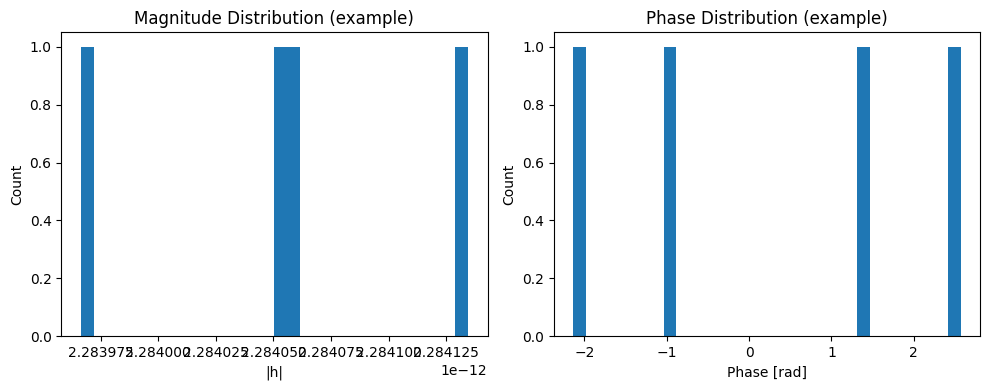

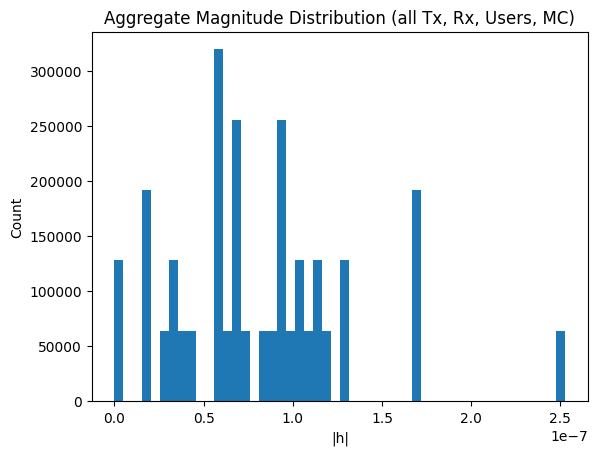

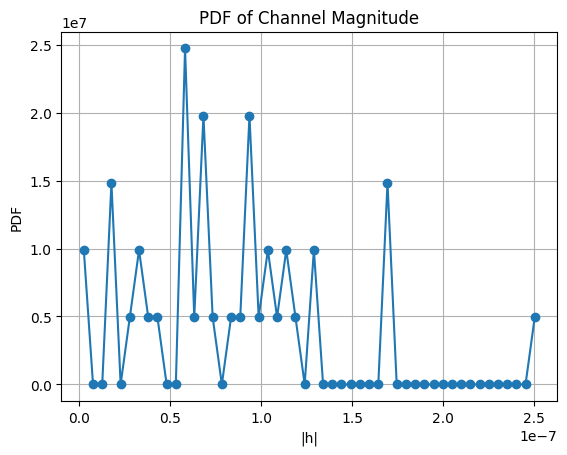

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Path to your saved MAT file (adjust the path as needed)
mat_path = '/Users/muahmed/Desktop/Globecom 2025/nas-wireless/dataset/Quadriga/Outputs/Scenario_1.mat'

# Load the .mat file using h5py
with h5py.File(mat_path, 'r') as mat:
    # 'H_all' is stored as a structured array with fields 'real' and 'imag'
    H_all_struct = np.array(mat['H_all'])

# Convert the structured array to a native complex array
H_real = H_all_struct['real']
H_imag = H_all_struct['imag']
H_all = H_real + 1j * H_imag

print("H_all shape:", H_all.shape)  # Expected shape: (MC, Tx, Users, Rx)

# Flatten the channel data across all dimensions to obtain a 1D array of complex values.
all_h = H_all.flatten()

# Compute magnitude and phase
all_mag = np.abs(all_h)
all_phase = np.angle(all_h)

# Use gaussian_kde to estimate continuous probability density functions
mag_kde = gaussian_kde(all_mag)
phase_kde = gaussian_kde(all_phase)

# Create grid for plotting PDF of magnitude
mag_vals = np.linspace(all_mag.min(), all_mag.max(), 1000)
phase_vals = np.linspace(all_phase.min(), all_phase.max(), 1000)

# Plot the continuous PDF for magnitude
plt.figure(figsize=(8,5))
plt.plot(mag_vals, mag_kde(mag_vals), 'b-', linewidth=2)
plt.title("PDF of Channel Magnitude (All Users, Antennas, MC)")
plt.xlabel("|h|")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()

# Plot the continuous PDF for phase
plt.figure(figsize=(8,5))
plt.plot(phase_vals, phase_kde(phase_vals), 'r-', linewidth=2)
plt.title("PDF of Channel Phase (All Users, Antennas, MC)")
plt.xlabel("Phase (radians)")
plt.ylabel("Probability Density")
plt.grid(True)
plt.show()
